In [74]:
from RutishauserLabtoNWB import helper, single_neuron
from pynwb import NWBHDF5IO
import numpy as np
import re

# Creating the Data Matrix and Predictions

In [58]:
def make_firing_matrix(neurons):
    num_categories = 5
    mat = np.empty((len(neurons), 2*num_categories))
    stat_type = np.empty(len(neurons))  # 0: none, 1: vs, 2: ms, 3: vs and ms
    for i in range(len(neurons)):
        trial_type = [neurons[i].trials_learn, neurons[i].trials_recog]
        for j in range(2):
            for k in range(num_categories):
                spike_rate_sum = 0
                for trial in trial_type[j][(k*20):((k+1)*20)]:
                    spike_rate_sum += trial.win_spike_rate(neurons[i].spike_timestamps, 1000, 2000)
                mat[i, 5*j+k] = spike_rate_sum
        neuron_type = 0
        if neurons[i].vs_test() < 0.05:
            neuron_type += 1
        if neurons[i].ms_test(1000) < 0.05:
            neuron_type += 2
        stat_type[i] = neuron_type
    return mat, stat_type

In [30]:
file = NWBHDF5IO('NWBData/P9HMH_NOID5.nwb', mode='r').read()
neurons = single_neuron.extract_neuron_data_from_nwb(file)

Session_id:  H09_5
Channel:  1
Cell_id:  0
Number of spikes: 573
Session_id:  H09_5
Channel:  2
Cell_id:  1
Number of spikes: 298
Session_id:  H09_5
Channel:  2
Cell_id:  1
Number of spikes: 5547
Session_id:  H09_5
Channel:  3
Cell_id:  2
Number of spikes: 4596
Session_id:  H09_5
Channel:  4
Cell_id:  3
Number of spikes: 2859
Session_id:  H09_5
Channel:  4
Cell_id:  3
Number of spikes: 446
Session_id:  H09_5
Channel:  5
Cell_id:  4
Number of spikes: 4129
Session_id:  H09_5
Channel:  7
Cell_id:  5
Number of spikes: 1125
Session_id:  H09_5
Channel:  8
Cell_id:  6
Number of spikes: 614
Session_id:  H09_5
Channel:  8
Cell_id:  6
Number of spikes: 8023
Session_id:  H09_5
Channel:  18
Cell_id:  7
Number of spikes: 642
Session_id:  H09_5
Channel:  18
Cell_id:  7
Number of spikes: 1881
Session_id:  H09_5
Channel:  19
Cell_id:  8
Number of spikes: 4090
Session_id:  H09_5
Channel:  19
Cell_id:  8
Number of spikes: 531
Session_id:  H09_5
Channel:  20
Cell_id:  9
Number of spikes: 9418
Session_id:

In [63]:
data_matrix, predictions = make_firing_matrix(neurons)

In [56]:
file2 = NWBHDF5IO('NWBData/P9HMH_NOID6.nwb', mode='r').read()
neurons2 = single_neuron.extract_neuron_data_from_nwb(file2)

Session_id:  H09_6
Channel:  2
Cell_id:  0
Number of spikes: 1180
Session_id:  H09_6
Channel:  3
Cell_id:  1
Number of spikes: 880
Session_id:  H09_6
Channel:  4
Cell_id:  2
Number of spikes: 2943
Session_id:  H09_6
Channel:  5
Cell_id:  3
Number of spikes: 2916
Session_id:  H09_6
Channel:  6
Cell_id:  4
Number of spikes: 629
Session_id:  H09_6
Channel:  6
Cell_id:  4
Number of spikes: 1745
Session_id:  H09_6
Channel:  8
Cell_id:  5
Number of spikes: 1066
Session_id:  H09_6
Channel:  8
Cell_id:  5
Number of spikes: 1010
Session_id:  H09_6
Channel:  18
Cell_id:  6
Number of spikes: 1652
Session_id:  H09_6
Channel:  18
Cell_id:  6
Number of spikes: 2017
Session_id:  H09_6
Channel:  19
Cell_id:  7
Number of spikes: 1216
Session_id:  H09_6
Channel:  19
Cell_id:  7
Number of spikes: 1883
Session_id:  H09_6
Channel:  20
Cell_id:  8
Number of spikes: 1642
Session_id:  H09_6
Channel:  21
Cell_id:  9
Number of spikes: 811
Session_id:  H09_6
Channel:  21
Cell_id:  9
Number of spikes: 2157
Sessio

In [64]:
mat, pred = make_firing_matrix(neurons2)

In [68]:
data_matrix = np.append(data_matrix, mat, axis=0)
predictions = np.append(predictions, pred, axis=0)

In [73]:
print(data_matrix.shape)
print(predictions.shape)

(43, 10)
(43,)


In [71]:
np.savez_compressed('neuron_firing_matrix', data_matrix)
np.savez_compressed('neuron_predicted_labels', predictions)

# Initial Exploration of Dimensionality Reduction Methods
Hi Renee! :)

In [72]:
# # open the files by uncommenting this chunk!
# data_matrix = np.load('neuron_firing_matrix.npz')['arr_0']
# predictions = np.load('neuron_predicted_labels.npz')['arr_0']
# print(data_matrix.shape)  # should be (43, 10)
# print(predictions.shape)  # should be (43,)

# Random Exploration
Feel free to ignore or to further play with the data here.

In [20]:
# import RutishauserLabtoNWB as RLab

dataDirectory = 'NWBData'
list_of_patients_behavior = [5, 6]  # List of sessions to summarize behavior. Set to [] to skip
list_of_patients_neurons = [132]    # List of sessions to analyze neural data for. Set to [] to skip

# RLab.NO2NWB_analysis(NWBFilePath,list_of_patients_behavior, list_of_patients_neurons)

Session_id:  CS58_132
Channel:  146
Cell_id:  0
Number of spikes: 1037
Session_id:  CS58_132
Channel:  148
Cell_id:  1
Number of spikes: 1365
Session_id:  CS58_132
Channel:  149
Cell_id:  2
Number of spikes: 2324
Session_id:  CS58_132
Channel:  150
Cell_id:  3
Number of spikes: 3589
Session_id:  CS58_132
Channel:  177
Cell_id:  4
Number of spikes: 722
Session_id:  CS58_132
Channel:  181
Cell_id:  5
Number of spikes: 5699
Session_id:  CS58_132
Channel:  182
Cell_id:  6
Number of spikes: 937
Session_id:  CS58_132
Channel:  183
Cell_id:  7
Number of spikes: 749
Processing..:  CS58_132  146   614
Processing..:  CS58_132  148   776
Processing..:  CS58_132  149   821
Processing..:  CS58_132  150   1093
Processing..:  CS58_132  177   551
Processing..:  CS58_132  181   1422
Processing..:  CS58_132  182   527
Processing..:  CS58_132  183   529
There are 5 VS cell(s) in this session(132): NWBData/P58CS_NOID132.nwb
There are 0 MS cell(s) in this session(132): NWBData/P58CS_NOID132.nwb


/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


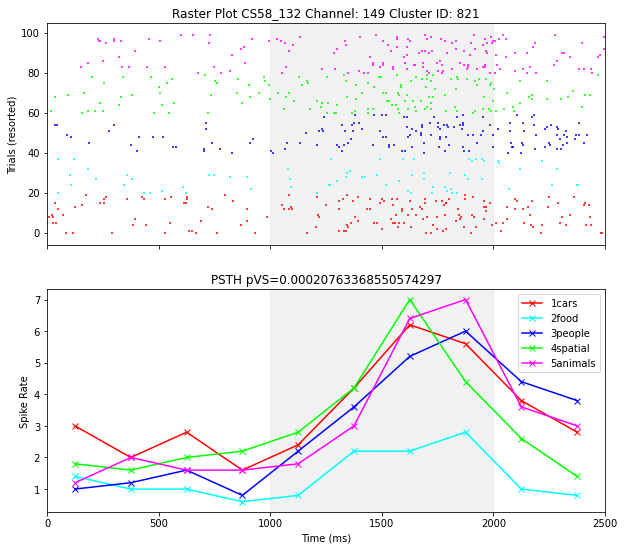

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


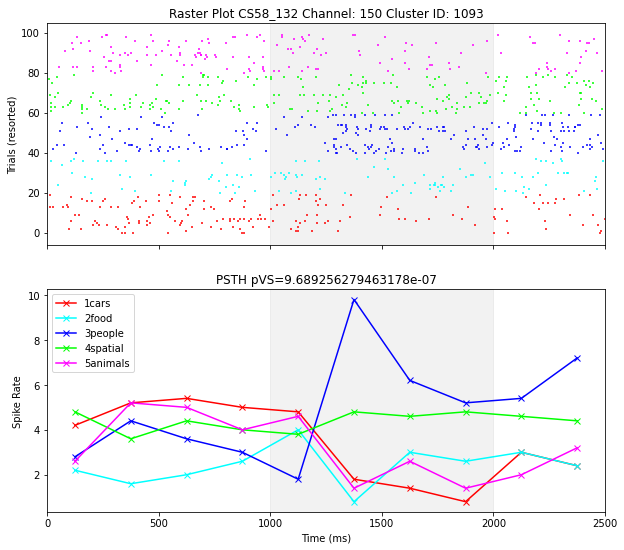

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


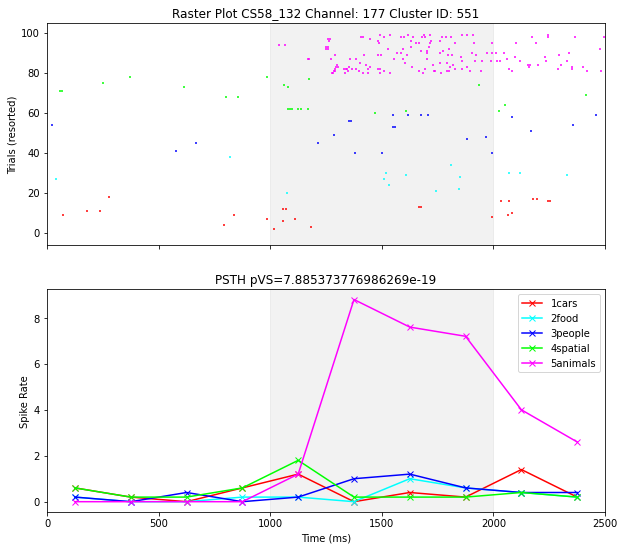

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


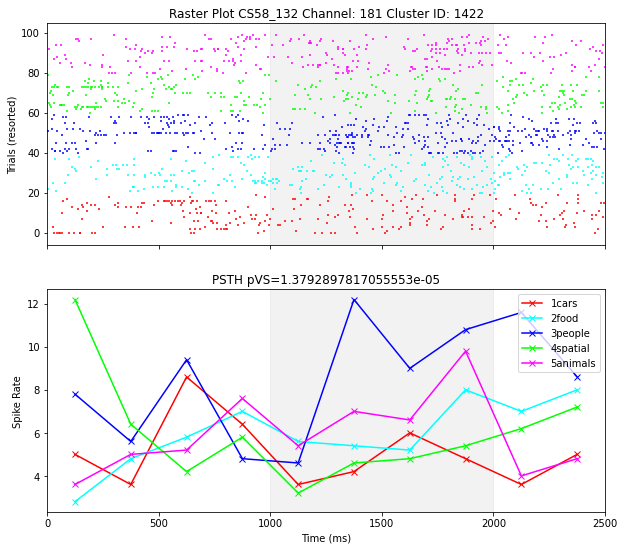

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


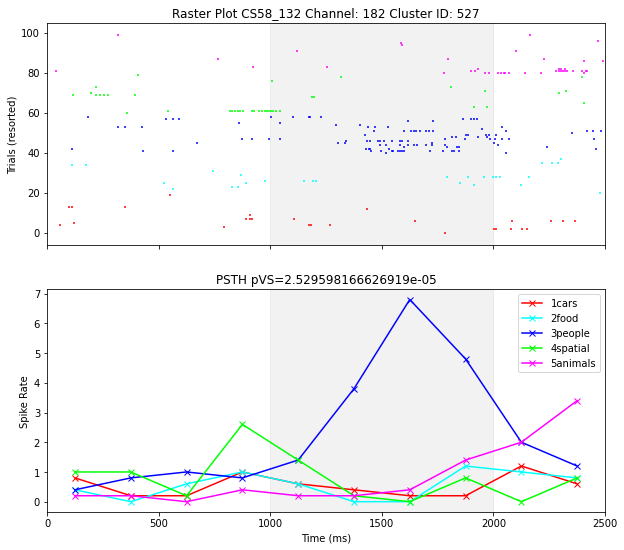

In [25]:
for session in list_of_patients_neurons:
        session_file = helper.getpatientfile_fromINIfile(session, dataDirectory) # Session file = .nwb file

        neurons = []
        # Get neurons from nwbfile
        try:
            nwbfile = helper.read(session_file)
        except ValueError as e:
            print('Problem opening the file: ' + str(e))
            # logging.warning('Error opening file: ' + session_file)
            continue
        try:
            temp = single_neuron.extract_neuron_data_from_nwb(nwbfile)
        except IndexError as e:
            print("Somehow catch this index error: " + str(e))
            continue
        neurons = neurons + temp

        # Find visually selective (VS) neurons and memory selective (MS) neurons
        vs_neurons = []
        ms_neurons = []

        for neuron in neurons:
            print('Processing..: ', str(neuron.session_id) + ' ', str(neuron.channel_id),' ', str(neuron.neuron_id))
            if neuron.vs_test() < 0.05:
                vs_neurons.append(neuron)
            if neuron.ms_test(1000) < 0.05:
                ms_neurons.append(neuron)

        # Get some Data about VS & MS cells
        print('There are {} VS cell(s) in this session({}): {}'.format(len(vs_neurons), session ,session_file))
        print('There are {} MS cell(s) in this session({}): {}'.format(len(ms_neurons), session ,session_file))


        # Plot the raster/psth for ALL VS neurons and MS neurons in the identified session
        for i in range(0, len(vs_neurons)):
            vs_neurons[i].raster_psth(cell_type='visual')

        for i in range(0, len(ms_neurons)):
            ms_neurons[i].raster_psth(cell_type='memory')

In [3]:
file = NWBHDF5IO('NWBData/P9HMH_NOID5.nwb', mode='r').read()

In [12]:
def get_event_data(nwbfile):
    """
    Get event data from the nwbfile
    """
    events = nwbfile.get_acquisition('events')
    experiment_id_list = np.asarray(nwbfile.get_acquisition('experiment_ids').data)
    events_data = np.asarray(events.data)
    events_timestamps = np.asarray(events.timestamps)

    experiment_description = nwbfile.data_collection

    experiment_ids = re.findall(r'\d+', experiment_description)
    experiment_id_learn = int(experiment_ids[0])
    experiment_id_recog = int(experiment_ids[1])

    ind_learn = np.where(experiment_id_list == experiment_id_learn)
    ind_recog = np.where(experiment_id_list == experiment_id_recog)

    events_learn = events_data[ind_learn].astype(float)
    timestamps_learn = events_timestamps[ind_learn]

    events_recog = events_data[ind_recog].astype(float)
    timestamps_recog = events_timestamps[ind_recog]

    return events_learn, timestamps_learn, events_recog, timestamps_recog

In [17]:
events_learn, timestamps_learn, events_recog, timestamps_recog = get_event_data(file)